   .\.venv\Scripts\Activate.ps1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 10 # Number of time steps / Horizon
Ts = 0.5 # Sampling time
C = np.array([1, -2/3])
Q = C.T @ C + 0.001 * np.eye(2)
R = 0.1
x0 = np.array([[10], [10]])

# Define the system dynamics
A = np.array([[1, Ts], [0, 1]])
B = np.array([[0], [-Ts]])

# Compute optimal input sequence LQR with the backward recursion
def lqr_backward(A, B, Q, R, N, x0):
    P = Q
    K = np.zeros((N, 2))

    for k in range(N-1, -1, -1):
        K[k] = -1/(R + B.T @ P @ B ) * B.T @ P @ A
        P = Q + A.T @ P @ (A + B @ K[k].reshape(1,2))

    return K

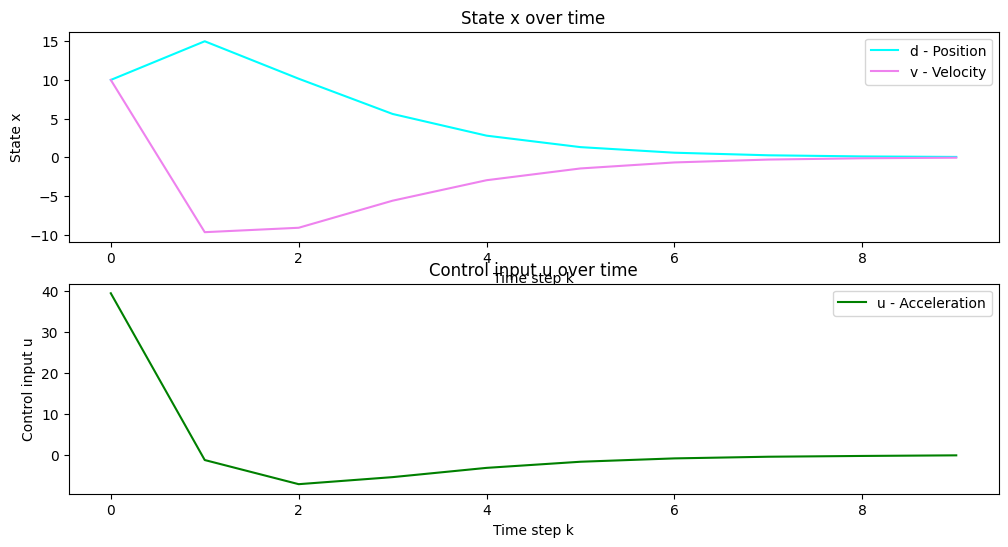

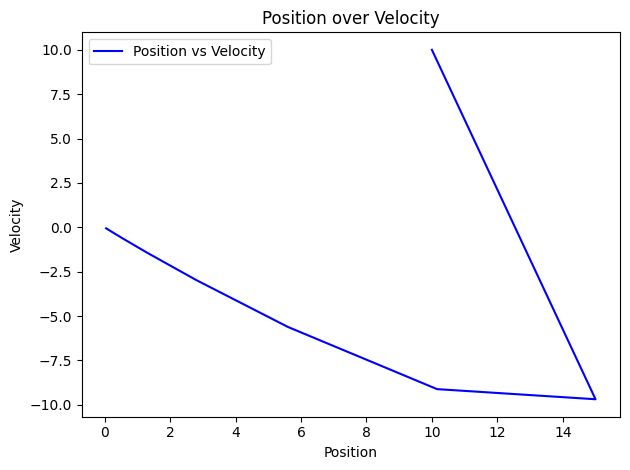

In [3]:
K = lqr_backward(A, B, Q, R, N, x0)

x = np.zeros((2, N))
x[:,0] = x0.flatten()
u = np.zeros(N)

# Simulate the system
for k in range(N-1):
    u[k] = K[k] @ x[:,k]
    x[:,k+1] = (A @ x[:,k]) + (B * u[k]).flatten()
    
    # Flag if the norm of the state is greater than 100
    if np.linalg.norm(x[:,k]) > 100:
        print('State norm exceeded 100 at time step k =', k)
        print('State x =', x[:,k])
        break

# Plot the results
time_steps = np.arange(N)
plt.figure(figsize=(12, 6))

# Plot x
plt.subplot(2, 1, 1)
plt.plot(time_steps, x[0, :], label='d - Position', color='cyan')
plt.plot(time_steps, x[1, :], label='v - Velocity', color='violet')
plt.xlabel('Time step k')
plt.ylabel('State x')
plt.title('State x over time')
plt.legend()

# Plot u
plt.subplot(2, 1, 2)
plt.plot(time_steps, u, label='u - Acceleration', color='green')
plt.xlabel('Time step k')
plt.ylabel('Control input u')
plt.title('Control input u over time')
plt.legend()

# Plot x
plt.figure()
plt.plot(x[0], x[1], label='Position vs Velocity', color='blue')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Position over Velocity')
plt.legend()

plt.tight_layout()
plt.show()